# Pune House Price Prediction 📶💸💸🏚️🏗️🏠💸💸📶

## Predictive Modeling

### Model Research Purpose: 
- To build common regression models with the given data
- Perform hyperparameter tuning, reducing overfitting
- Identify best set of model and use it for prediction 

In [81]:
import os
import numpy as np
import pandas as pd
import pickle
import json
import math
import re

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import TargetEncoder

from sklearn.linear_model import LinearRegression, LassoLars, LarsCV, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [47]:
train_path = "../data/processed/data/train-v1.csv"
train_df = pd.read_csv(train_path)
test_path = "../data/processed/data/test-v1.csv"
test_df = pd.read_csv(test_path)

In [48]:
features = list(train_df.columns)
label = features.pop(-1)
print(features)
print(label)

['Location', 'Area_sqft', 'Developer', 'Name', 'No_of_Bedroom', 'Township_Size_Ordinal', 'Loc_trend', 'Loc_tag_ordinal', 'hasClubHouse_yes', 'hasEduFacility_yes', 'hasHospital_yes', 'hasMall_yes', 'hasParkOrJogTrack_yes', 'hasPool_yes', 'hasGym_yes']
Price_Mil


In [49]:
X_train =train_df[features]
X_test =test_df[features]

y_train = train_df[label]
y_test = test_df[label]

print("Column orrder : \n", features)
print("Label column is : \n", label)
print("Data Shape: \n")
print("Train features: ", X_train.shape, ", Label: ", y_train.shape)
print("Test features: ", X_test.shape, ", Label: ", y_test.shape)

Column orrder : 
 ['Location', 'Area_sqft', 'Developer', 'Name', 'No_of_Bedroom', 'Township_Size_Ordinal', 'Loc_trend', 'Loc_tag_ordinal', 'hasClubHouse_yes', 'hasEduFacility_yes', 'hasHospital_yes', 'hasMall_yes', 'hasParkOrJogTrack_yes', 'hasPool_yes', 'hasGym_yes']
Label column is : 
 Price_Mil
Data Shape: 

Train features:  (160, 15) , Label:  (160,)
Test features:  (40, 15) , Label:  (40,)


### Start with simple set of models and test using regression metrics

In [5]:
def print_results(y_pred, y_act):

    mse = np.mean((y_pred - y_act)**2)
    print("[INFO] MSE: ", mse)

    rmse = np.sqrt(mse)
    print("[INFO] RMSE: ", rmse)

In [6]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred_train = lin_reg_model.predict(X_train)
y_pred_test = lin_reg_model.predict(X_test)
print("Training Performance:")
print_results(y_pred_train, y_train)
print("Training R2: ", lin_reg_model.score(X_train, y_train))
print("*****************************************")
print("Testing Performance:")
print_results(y_pred_test, y_test)
print("Testing R2: ", lin_reg_model.score(X_test, y_test))    

Training Performance:
[INFO] MSE:  3.6187982957067795
[INFO] RMSE:  1.9023139319541293
Training R2:  0.8644108742164938
*****************************************
Testing Performance:
[INFO] MSE:  23.16140650257239
[INFO] RMSE:  4.8126298946181585
Testing R2:  0.5971780576741363


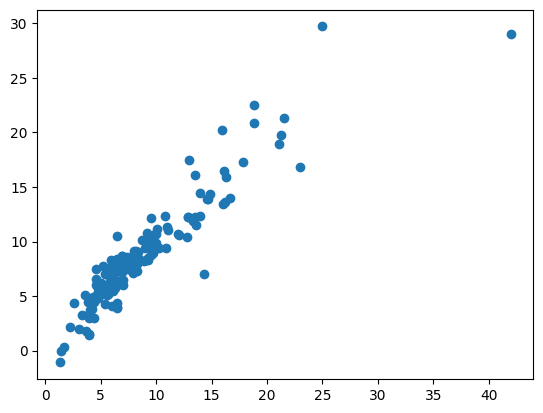

In [8]:
plt.scatter(y_train,y_pred_train)

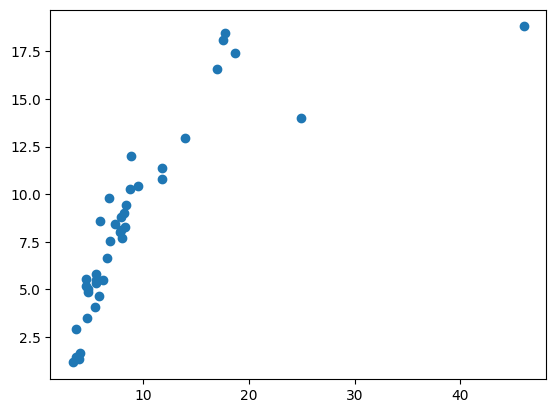

In [9]:
plt.scatter(y_test,y_pred_test)

In [10]:
pickle.dump(lin_reg_model, open("../data/processed/artifacts/lrmodel.pkl", "wb"))
print("Model stored at: "+ "../data/processed/artifacts/lrmodel.pkl")

Model stored at: ../data/processed/artifacts/lrmodel.pkl


#### Try lasso regression to regularize and avoid overfitting

In [50]:
lass_reg_model = LarsCV(cv=5, max_iter=1000, eps = 0.1)
lass_reg_model.fit(X_train, y_train)

LarsCV(cv=5, eps=0.1, max_iter=1000)

In [51]:
y_pred_train = lass_reg_model.predict(X_train)
y_pred_test = lass_reg_model.predict(X_test)
print("Training Performance:")
print_results(y_pred_train, y_train)
print("Training R2: ", lass_reg_model.score(X_train, y_train))
print("*****************************************")
print("Testing Performance:")
print_results(y_pred_test, y_test)
print("Testing R2: ", lass_reg_model.score(X_test, y_test))    

Training Performance:
[INFO] MSE:  3.831992425107029
[INFO] RMSE:  1.957547553728141
Training R2:  0.8564229170922049
*****************************************
Testing Performance:
[INFO] MSE:  23.76469790246229
[INFO] RMSE:  4.874904912145702
Testing R2:  0.5866856459345838


In [82]:
sgd_reg_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg_model.fit(X_train, y_train)

y_pred_train = sgd_reg_model.predict(X_train)
y_pred_test = sgd_reg_model.predict(X_test)
print("Training Performance:")
print_results(y_pred_train, y_train)
print("Training R2: ", sgd_reg_model.score(X_train, y_train))
print("*****************************************")
print("Testing Performance:")
print_results(y_pred_test, y_test)
print("Testing R2: ", sgd_reg_model.score(X_test, y_test))    

Training Performance:
[INFO] MSE:  3.8835707929560463
[INFO] RMSE:  1.9706777496475791
Training R2:  0.8544903789304937
*****************************************
Testing Performance:
[INFO] MSE:  26.588641576972474
[INFO] RMSE:  5.156417513833851
Testing R2:  0.5375717686811152


#### The above is the simplest model with no tuning at all. Still the model generalizes in the training.

#### The overfitting can be seen due to the Target encoding of some categorical string features and can be easily avoided by using different encoding

### Trying Tree based models

In [11]:
dt_reg_model = DecisionTreeRegressor()
dt_reg_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [12]:
y_pred_train = dt_reg_model.predict(X_train)
y_pred_test = dt_reg_model.predict(X_test)
print("Training Performance:")
print_results(y_pred_train, y_train)
print("Training R2: ", dt_reg_model.score(X_train, y_train))
print("*****************************************")
print("Testing Performance:")
print_results(y_pred_test, y_test)
print("Testing R2: ", dt_reg_model.score(X_test, y_test))  

Training Performance:
[INFO] MSE:  0.0
[INFO] RMSE:  0.0
Training R2:  1.0
*****************************************
Testing Performance:
[INFO] MSE:  27.82118805
[INFO] RMSE:  5.274579419252307
Testing R2:  0.5161353863864262


#### Clear overfitting can be seen with classical decision tree models, and can be tuned further

In [23]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4,5,6,7],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30] }

In [24]:
tuned_dt_reg_model=GridSearchCV(dt_reg_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [54]:
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
tuned_dt_reg_model.fit(X_train, y_train)

Fitting 3 folds for each of 3360 candidates, totalling 10080 fits
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-15.483 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-21.729 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-13.460 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-23.186 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-38.056 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': ['log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [55]:
tuned_dt_reg_model.best_params_


{'max_depth': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [56]:
tuned_dt_reg_model.best_score_

-9.481499492663962

In [69]:
hype_dt_reg_model = DecisionTreeRegressor(max_depth=150,max_features=16,max_leaf_nodes=150,min_samples_leaf=50,splitter='best')
hype_dt_reg_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
y_pred_train = hype_dt_reg_model.predict(X_train)
y_pred_test = hype_dt_reg_model.predict(X_test)
print("Training Performance:")
print_results(y_pred_train, y_train)
print("Training R2: ", hype_dt_reg_model.score(X_train, y_train))
print("*****************************************")
print("Testing Performance:")
print_results(y_pred_test, y_test)
print("Testing R2: ", hype_dt_reg_model.score(X_test, y_test))  

Training Performance:
[INFO] MSE:  0.0
[INFO] RMSE:  0.0
Training R2:  1.0
*****************************************
Testing Performance:
[INFO] MSE:  27.107500124999994
[INFO] RMSE:  5.20648635117773
Testing R2:  0.5285478085824222


In [79]:
from sklearn.ensemble import RandomForestRegressor
rf_reg_model = RandomForestRegressor(n_estimators=450, max_depth=150, min_samples_split=3, max_features=10, random_state=42)
rf_reg_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=150, max_features=10, min_samples_split=3,
                      n_estimators=450, random_state=42)

In [80]:
y_pred_train = rf_reg_model.predict(X_train)
y_pred_test = rf_reg_model.predict(X_test)
print("Training Performance:")
print_results(y_pred_train, y_train)
print("Training R2: ", rf_reg_model.score(X_train, y_train))
print("*****************************************")
print("Testing Performance:")
print_results(y_pred_test, y_test)
print("Testing R2: ", rf_reg_model.score(X_test, y_test))  

Training Performance:
[INFO] MSE:  0.8280990914040768
[INFO] RMSE:  0.9099995007713338
Training R2:  0.9689727852478539
*****************************************
Testing Performance:
[INFO] MSE:  26.69112380405424
[INFO] RMSE:  5.166345304376609
Testing R2:  0.5357894032724182


### Model interpretation

- It can be clearly seen that, with the given encodings, all of the regression models tend to overfit on training data.
- the available methods to prevent overfitting may not be sufficient in this case.
- There should be abundant data to make further research to prevent this overfitting and a deeper understanding of the features encoding.
- With all these, the actual model can be selected and used at the time of train and test pipelines in production